In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
df=pd.read_csv("C:/Users/hjo40/OneDrive/바탕 화면/데이터분석/데이터마이닝 프로젝트/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [141]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

변수 설명
Age: 직원의 나이  
Attrition: 퇴사 여부 (Yes/No)  
BusinessTravel: 출장 빈도 (Rarely, Frequently, Non-Travel)  
DailyRate: 하루 급여  
Department: 소속 부서 (Sales, Research & Development, Human Resources)  
DistanceFromHome: 집에서 회사까지의 거리  
Education: 교육 수준 (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')  
EducationField: 전공 분야 (Life Sciences, Other, Medical, Marketing 등)  
EmployeeCount: 직원 수 (모두 1로 설정된 상수)  
EmployeeNumber: 직원 고유 번호  
EnvironmentSatisfaction: 근무 환경 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
Gender: 성별 (Male/Female)  
HourlyRate: 시간당 급여  
JobInvolvement: 직무 몰입도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
JobLevel: 직급 수준  
JobRole: 직무 역할 (Sales Executive, Research Scientist 등)  
JobSatisfaction: 직무 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High')  
MaritalStatus: 결혼 상태 (Single, Married, Divorced)  
MonthlyIncome: 월급  
MonthlyRate: 월간 기본 급여율  
NumCompaniesWorked: 이전에 근무했던 회사 수  
Over18: 성인 여부 (모두 "Y")  
OverTime: 초과 근무 여부 (Yes/No)  
PercentSalaryHike: 연봉 인상률 (지난 연봉 대비 백분율)  
PerformanceRating: 성과 등급 (1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding')  
RelationshipSatisfaction: 인간관계 만족도 (1 'Low' 2 'Medium' 3 'High' 4 'Very High' )  
StandardHours: 표준 근무 시간 (모두 80으로 설정된 상수)  
StockOptionLevel: 주식 옵션 수준 (0~3으로 측정)  
TotalWorkingYears: 총 경력 연수  
TrainingTimesLastYear: 지난 1년간 교육받은 횟수  
WorkLifeBalance: 일과 삶의 균형 (1 'Bad' 2 'Good' 3 'Better' 4 'Best' )  
YearsAtCompany: 회사에서 근무한 연수  
YearsInCurrentRole: 현재 직무에서 근무한 연수  
YearsSinceLastPromotion: 마지막 승진 이후 지난 연수  
YearsWithCurrManager: 현재 관리자가 부임한 이후 함께한 연수  

In [142]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


값이 일정한 변수, 즉 고유값이 1인 변수들은 모델 학습에 의미가 없으므로 제거 필요

또한 직원 고유 번호 변수도 의미가 없으므로 제거

-----

## 데이터 정제 및 전처리

In [143]:
# 변수들의 고유값이 1, 즉 하나의 값만을 가진 변수들은 제거
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'])

In [144]:
# 변수들의 고유값을 파악함으로써 이상치가 있는지 간략하게 확인
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [145]:
# 전체적인 데이터 분포 파악
df.describe().transpose

<bound method DataFrame.transpose of                Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     

In [165]:
# 데이터 분포 파악 - 범주형 변수들의 이상치 확인
categorical_columns=["Attrition","BusinessTravel","Department","Education",
                "EducationField","EnvironmentSatisfaction", "Gender",
                "JobInvolvement","JobRole","JobSatisfaction","MaritalStatus",
                "PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","OverTime"] # 범주형 변수 목록
for col in categorical_columns:
    print(df[col].value_counts())
    print("-"*40 )

Attrition
0    733
1    156
Name: count, dtype: int64
----------------------------------------
BusinessTravel
Travel_Rarely        629
Travel_Frequently    170
Non-Travel            90
Name: count, dtype: int64
----------------------------------------
Department
Research & Development    571
Sales                     277
Human Resources            41
Name: count, dtype: int64
----------------------------------------
Education
3    334
4    235
2    181
1    113
5     26
Name: count, dtype: int64
----------------------------------------
EducationField
Life Sciences       375
Medical             250
Marketing           106
Technical Degree     86
Other                54
Human Resources      18
Name: count, dtype: int64
----------------------------------------
EnvironmentSatisfaction
4    274
3    272
2    173
1    170
Name: count, dtype: int64
----------------------------------------
Gender
1    555
0    334
Name: count, dtype: int64
----------------------------------------
JobInvolvemen

![대체 텍스트](../gggg.png)  ![대체 텍스트](../hhhh.png)  
![대체 텍스트](../kkkk.png)  ![대체 텍스트](../jjjjj.png) 

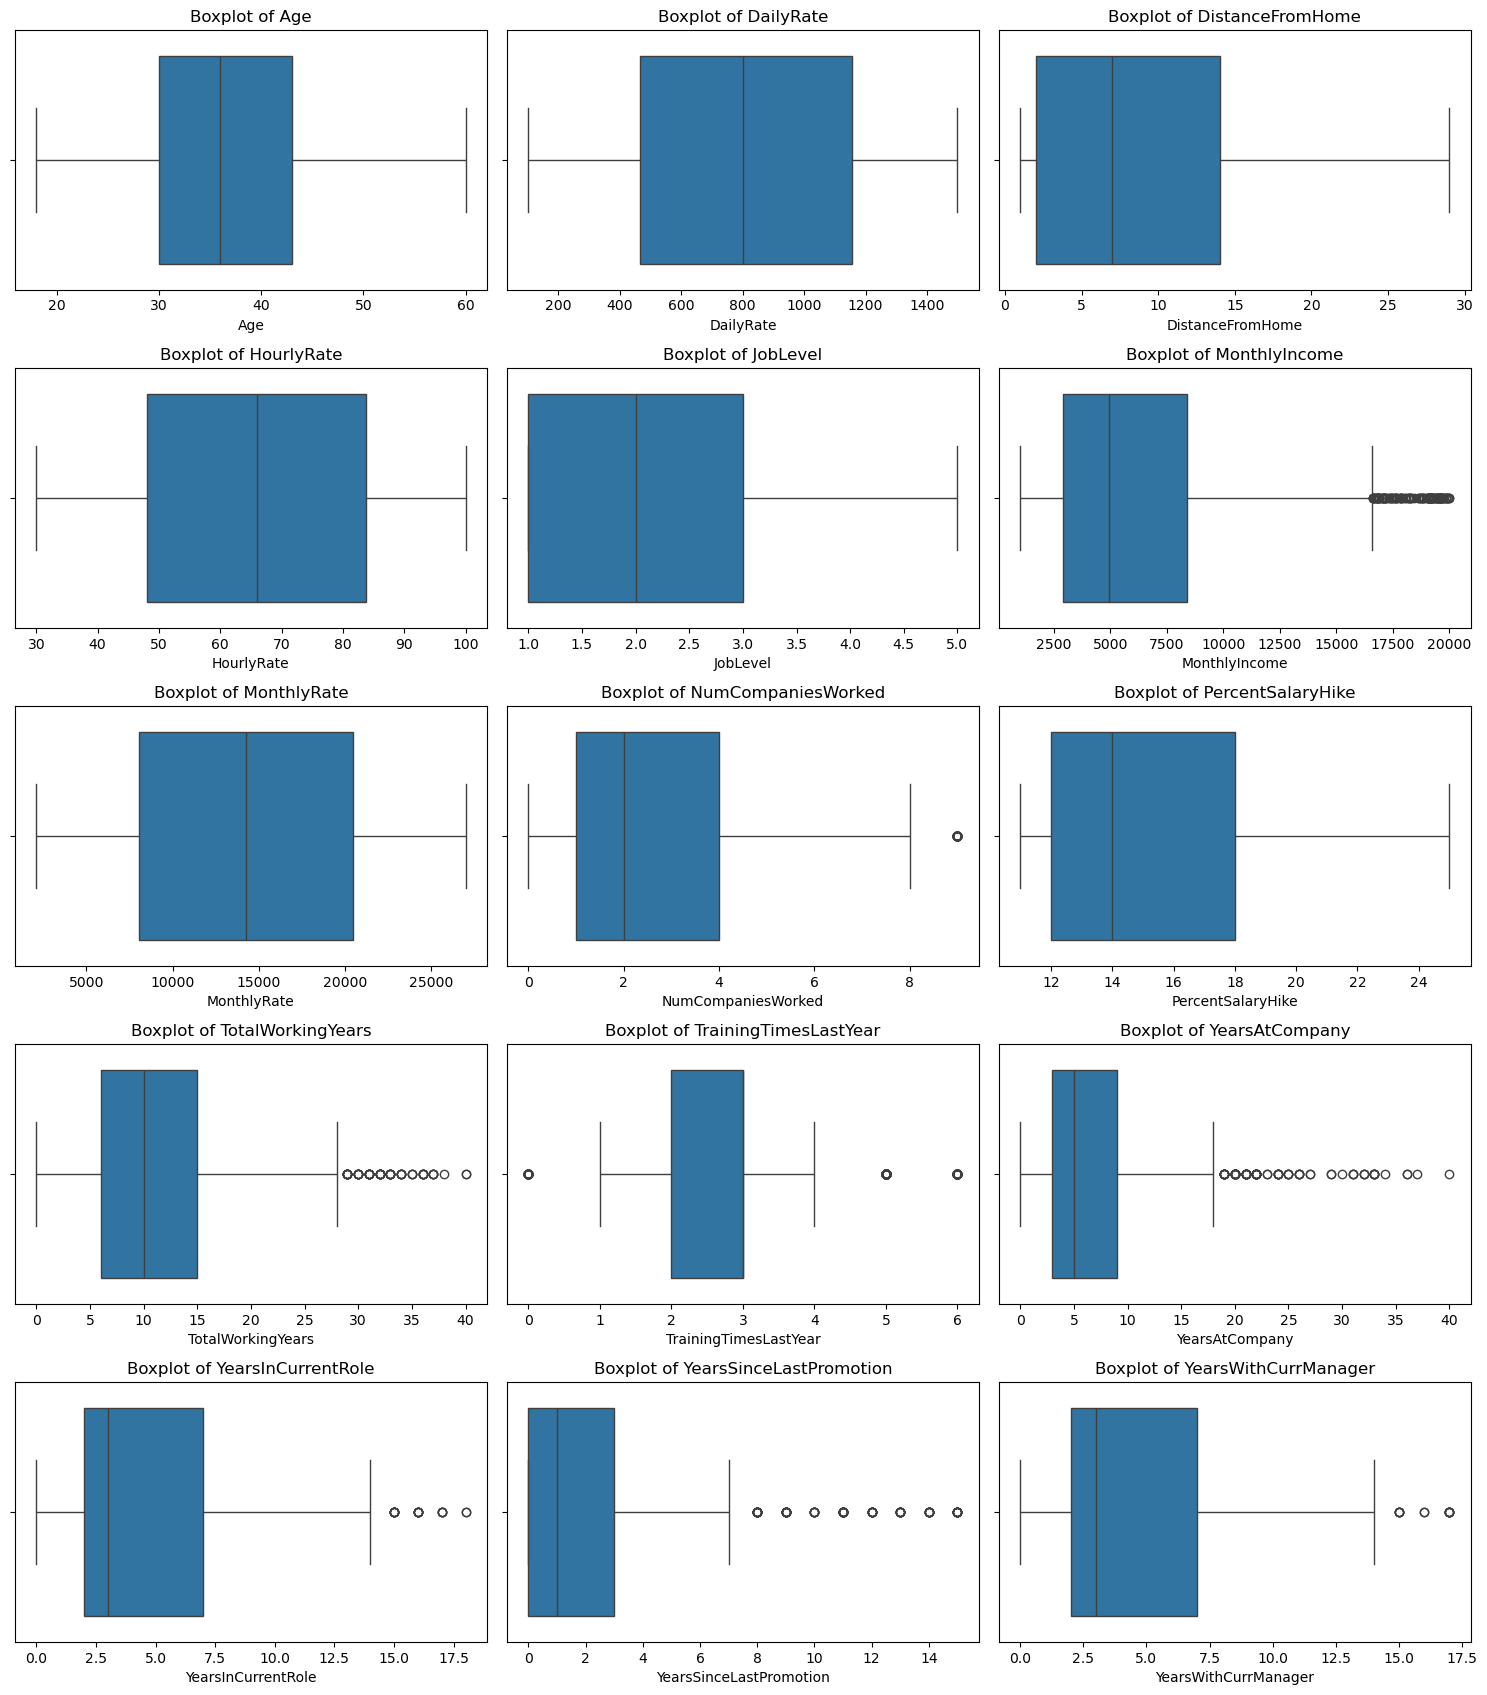

In [147]:
# 데이터 분포 파악 - 숫자형 변수들의 이상치 파악을 위한 박스플롯
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 리스트
exclude_col = ["Attrition","BusinessTravel","Department","Education",
                "EducationField","EnvironmentSatisfaction", "Gender",
                "JobInvolvement","JobRole","JobSatisfaction","MaritalStatus",
                "PerformanceRating","RelationshipSatisfaction","StockOptionLevel","WorkLifeBalance","OverTime"]

# 나머지 변수들만
numeric_col = [col for col in df.columns if col not in exclude_col]

# 각 변수에 대한 박스플롯 그리기
plt.figure(figsize=(15, 20))
for i, col in enumerate(numeric_col, 1):
    plt.subplot(len(numeric_col)//3 + 1, 3, i) 
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

해당 박스플롯 확인 결과  
'MonthlyIncome', 'NumCompaniesWorked','TotalWorkingYears', 'TrainingTimesLastYear',  
'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'  
이 변수들의 이상치를 제거해야함.

In [148]:
# 숫자형 변수 이상치 제거
outlier_col = [
    'MonthlyIncome', 'NumCompaniesWorked','TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'  
]

# IQR 방법을 사용하여 이상치 제거
for col in outlier_col:
    Q1 = df[col].quantile(0.25)  # 1사분위수
    Q3 = df[col].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1                # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한
    upper_bound = Q3 + 1.5 * IQR  # 상한
    # 범위를 벗어나는 값은 이상치로 간주하고 제거
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


범주형 변수들이 문자열로 구성되어 있으므로, 숫자로 바꾸어 분석에 사용해야함.

In [149]:
# 범주가 두 개인 변수들은 맵핑 이용#1
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Attrition']

1       0
2       1
3       0
5       0
6       0
       ..
1463    0
1464    0
1465    0
1468    0
1469    0
Name: Attrition, Length: 889, dtype: int64

In [150]:
# 범주가 두 개인 변수들은 맵핑 이용#2
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['OverTime']

1       0
2       1
3       1
5       0
6       1
       ..
1463    0
1464    0
1465    0
1468    0
1469    0
Name: OverTime, Length: 889, dtype: int64

In [151]:
# 범주형 변수들의 변환
df1 = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

In [152]:
# 결측치 확인
print(df1.isna().sum())

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [153]:
# 중복 데이터 확인
duplicates = df1[df1.duplicated()]  
print("중복 있음:", len(duplicates) != 0)

중복 있음: False


In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                889 non-null    int64
 1   Attrition                          889 non-null    int64
 2   DailyRate                          889 non-null    int64
 3   DistanceFromHome                   889 non-null    int64
 4   Education                          889 non-null    int64
 5   EnvironmentSatisfaction            889 non-null    int64
 6   Gender                             889 non-null    int64
 7   HourlyRate                         889 non-null    int64
 8   JobInvolvement                     889 non-null    int64
 9   JobLevel                           889 non-null    int64
 10  JobSatisfaction                    889 non-null    int64
 11  MonthlyIncome                      889 non-null    int64
 12  MonthlyRate               

데이터 타입을 보면 더미변수들이 bool타입임을 알 수 있음 -> 추후 변환 필요

In [155]:
# 숫자형 변수들에 대해 데이터 스케일링 진행
scaler = StandardScaler()
df1[numeric_col] = scaler.fit_transform(df[numeric_col])
df1.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1,1.644388,0,-1.327807,-0.161026,1,3,1,-0.246853,2,0.430517,...,False,False,False,False,False,True,False,False,True,False
2,0.232417,1,1.408075,-0.897026,2,4,1,1.269646,2,-0.936374,...,False,True,False,False,False,False,False,False,False,True
3,-0.238240,0,1.455590,-0.774359,4,4,0,-0.491449,3,-0.936374,...,False,False,False,False,False,True,False,False,True,False


In [156]:
X = df1.drop(columns=['Attrition'])  # 종속 변수 'Attrition'을 제외하고 독립 변수만 선택
X = X.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)  # bool 타입을 int로 변환

y = df1['Attrition']  # 종속 변수


In [157]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1,1.644388,-1.327807,-0.161026,1,3,1,-0.246853,2,0.430517,2,...,0,0,0,0,0,1,0,0,1,0
2,0.232417,1.408075,-0.897026,2,4,1,1.269646,2,-0.936374,3,...,0,1,0,0,0,0,0,0,0,1
3,-0.238240,1.455590,-0.774359,4,4,0,-0.491449,3,-0.936374,3,...,0,0,0,0,0,1,0,0,1,0
5,-0.355905,0.487778,-0.897026,2,4,1,0.633695,3,-0.936374,4,...,0,1,0,0,0,0,0,0,0,1
6,2.821031,1.285536,-0.774359,3,3,0,0.731533,4,-0.936374,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,-0.473569,-1.212770,-0.529026,3,2,1,0.389098,3,0.430517,1,...,0,0,0,1,0,0,0,0,0,1
1464,-1.061890,0.892909,-0.529026,3,4,0,-1.763351,2,-0.936374,3,...,0,0,0,0,0,0,0,1,0,1
1465,0.114752,0.185181,1.678975,2,3,1,-1.225238,4,0.430517,4,...,0,1,0,0,0,0,0,0,1,0
1468,1.644388,0.532793,-0.897026,3,4,1,-0.149014,2,0.430517,2,...,0,0,0,0,0,0,1,0,1,0


In [158]:
# 다중공선성 파악
# VIF계산
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# VIF 값 계산 및 출력
vif_df = calculate_vif(X)
print(vif_df)

                             variable         VIF
0                                 Age    1.638677
1                           DailyRate    1.071039
2                    DistanceFromHome    1.044419
3                           Education    1.133789
4             EnvironmentSatisfaction    1.060849
5                              Gender    1.061739
6                          HourlyRate    1.045078
7                      JobInvolvement    1.052844
8                            JobLevel    6.718194
9                     JobSatisfaction    1.057843
10                      MonthlyIncome    6.772813
11                        MonthlyRate    1.038963
12                 NumCompaniesWorked    1.408501
13                           OverTime    1.048450
14                  PercentSalaryHike    2.588894
15                  PerformanceRating    2.571348
16           RelationshipSatisfaction    1.044367
17                   StockOptionLevel    2.010940
18                  TotalWorkingYears    2.839607


VIF가 10이상인 변수들은 다중공선성 문제가 의심되므로 제거 

In [159]:
# VIF가 NaN이거나 특정 기준 이상인 변수 제거 반복
def remove_high_vif_columns(X, threshold=10):
    while True:
        vif_df = calculate_vif(X)
        
        # VIF가 NaN이거나 기준 이상인 변수 확인
        high_vif = vif_df[(vif_df['VIF'].isna()) | (vif_df['VIF'] >= threshold)]
        
        # 기준에 해당하는 변수가 없으면 반복 종료
        if high_vif.empty:
            break
        
        # 제거할 변수 선택 (VIF가 가장 높은 변수)
        remove_column = high_vif.sort_values('VIF', ascending=False).iloc[0]['variable']
        print(f"Removing {remove_column} with VIF {high_vif.iloc[0]['VIF']}")
        X = X.drop(columns=[remove_column])
    
    return X

# VIF가 NaN이거나 10 이상인 변수 제거 후 남은 변수들
X_cleaned_vif = remove_high_vif_columns(X, threshold=10)
print(calculate_vif(X_cleaned_vif))

Removing Department_Research & Development with VIF 229.63198489296514
Removing Department_Sales with VIF 15.491763633111077
Removing PerformanceRating with VIF 15.478053376737943
Removing EducationField_Life Sciences with VIF 14.987884210762143
Removing WorkLifeBalance with VIF 13.738187531909453
Removing JobInvolvement with VIF 13.206686270578055
                            variable       VIF
0                                Age  1.626643
1                          DailyRate  1.059006
2                   DistanceFromHome  1.038107
3                          Education  8.406482
4            EnvironmentSatisfaction  6.774330
5                             Gender  2.697537
6                         HourlyRate  1.036373
7                           JobLevel  6.612593
8                    JobSatisfaction  6.686870
9                      MonthlyIncome  6.695261
10                       MonthlyRate  1.036626
11                NumCompaniesWorked  1.405155
12                          OverTime  

In [160]:
# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X_cleaned_vif)
result = model.fit()

# 결과 출력
print(result.summary())

         Current function value: 0.302712
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  889
Model:                          Logit   Df Residuals:                      851
Method:                           MLE   Df Model:                           37
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3483
Time:                        20:06:23   Log-Likelihood:                -269.11
converged:                      False   LL-Null:                       -412.91
Covariance Type:            nonrobust   LLR p-value:                 1.546e-40
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.3561      0.144     -2.476      0.013      -0.638      -0.074

c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p-value 값이 0.05이상인 변수는 제거

In [161]:
# 초기 변수 설정
X_cleaned_pvalue = X_cleaned_vif  # 반복문 외부에서 초기화

while True:
    # 모델을 학습하고 p-value를 확인
    model = sm.Logit(y, X_cleaned_pvalue)
    result = model.fit(disp=0)  # disp=0으로 학습 중 출력을 생략
    p_values = result.pvalues
    high_p_value = p_values[p_values > 0.05]
    
    # 기각할 변수가 없으면 종료
    if high_p_value.empty:
        break
    
    # p-value가 가장 높은 변수 제거
    remove_column = high_p_value.idxmax()  # 가장 높은 p-value 변수 선택
    
    # 해당 변수 제거 (X_cleaned_pvalue에서 제거해야 함)
    X_cleaned_pvalue = X_cleaned_pvalue.drop(columns=[remove_column])

# 최종 결과 출력
print("최종 회귀 결과:")
print(result.summary())


최종 회귀 결과:
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                  889
Model:                          Logit   Df Residuals:                      872
Method:                           MLE   Df Model:                           16
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3304
Time:                        20:06:23   Log-Likelihood:                -276.51
converged:                       True   LL-Null:                       -412.91
Covariance Type:            nonrobust   LLR p-value:                 1.057e-48
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                 -0.3030      0.138     -2.198      0.028      -0.573      -0.033
DistanceFromHome                     0.4808      0.109 

c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\hjo40\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


![대체 텍스트](../ddd.png)  
통계적으로 유의미한 변수들만 남긴 결과 위의 결과를 토대로 퇴사 확률에 가장 많은 영향을 미치는 변수는 MaritalStatus_Single이며,  
Age (-0.3030): 나이가 많을수록 퇴사 가능성이 낮아집니다.  
DistanceFromHome (0.4808): 집에서 회사까지의 거리가 멀수록 퇴사 가능성이 높아집니다.  
EnvironmentSatisfaction (-0.5737): 근무 환경 만족도가 높을수록 퇴사 가능성이 낮아집니다.  
JobSatisfaction (-0.5936): 직무 만족도가 높을수록 퇴사 가능성이 낮아집니다.  
NumCompaniesWorked (0.4785): 이전에 근무한 회사 수가 많을수록 퇴사 가능성이 높아집니다.  
OverTime (1.8813): 초과 근무를 하는 경우 퇴사 가능성이 크게 높아집니다.  
RelationshipSatisfaction (-0.3723): 인간관계 만족도가 높을수록 퇴사 가능성이 낮아집니다.  
StockOptionLevel (-0.4319): 주식 옵션 수준이 높을수록 퇴사 가능성이 낮아집니다.  
TotalWorkingYears (-0.5894): 총 경력 연수가 많을수록 퇴사 가능성이 낮아집니다.  
YearsInCurrentRole (-0.4647): 현재 직무에서 근무한 연수가 길수록 퇴사 가능성이 낮아집니다.  
BusinessTravel_Travel_Frequently (1.7482): 출장이 잦은 경우 퇴사 가능성이 크게 높아집니다.  
BusinessTravel_Travel_Rarely (0.7434): 출장이 드문 경우 퇴사 가능성이 다소 높아집니다.  
EducationField_Marketing (0.7267): 전공이 마케팅인 경우 퇴사 가능성이 다소 높아집니다.  
EducationField_Technical Degree (1.0148): 전공이 기술 관련 학위인 경우 퇴사 가능성이 크게 높아집니다.  
JobRole_Laboratory Technician (0.9339): 직무가 실험실 기술자인 경우 퇴사 가능성이 높아집니다.  
JobRole_Sales Representative (1.0759): 직무가 영업 사원인 경우 퇴사 가능성이 높아집니다.  
MaritalStatus_Single (0.6727): 결혼 상태가 미혼(Single)인 경우 퇴사 가능성이 높아집니다.    

In [162]:
y.value_counts()

Attrition
0    733
1    156
Name: count, dtype: int64

모델을 구축하기 전 클래스의 비율을 보면 다음과 같음

통계적으로 유의하지 않은 변수들은 제거하고 모델을 구축하여 성능을 평가해보고, 제거하지 않은 변수들을 가지고 만든 모델과 성능을 비교해볼 것임.
이때, 클래스의 비율이 1:1이 아닌 불균형인 형태이므로 손실함수에 가중치를 주어서 모델을 만들 것 임.  

----

## 로지스틱 회귀 모델 구축

In [163]:
# 통계적으로 유의하지 않은 변수를 제거한 로지스틱 회귀 모델 구축
# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_pvalue, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7228464419475655



Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.82       225
           1       0.32      0.67      0.43        42

    accuracy                           0.72       267
   macro avg       0.62      0.70      0.62       267
weighted avg       0.83      0.72      0.76       267



In [164]:
# 통계적으로 유의하지 않은 변수를 제거하지 않은 로지스틱 회귀 모델 구축(VIF까진 처리)
# 데이터 분할 (훈련 및 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned_vif, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression(class_weight='balanced',max_iter=1000)
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7228464419475655

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82       225
           1       0.31      0.64      0.42        42

    accuracy                           0.72       267
   macro avg       0.62      0.69      0.62       267
weighted avg       0.82      0.72      0.76       267



두 모델 다 정확도는 비슷하나, 클래스 1에 대한 정밀도와 재현율에서 약간의 차이를 보인다.
변수를 제거한 모델이 조금 더 좋은 성능을 보인다.